<a href="https://colab.research.google.com/github/HSYhrae/TIL/blob/master/Logistic_Regression(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글폰트 적용

In [ ]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,909 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline

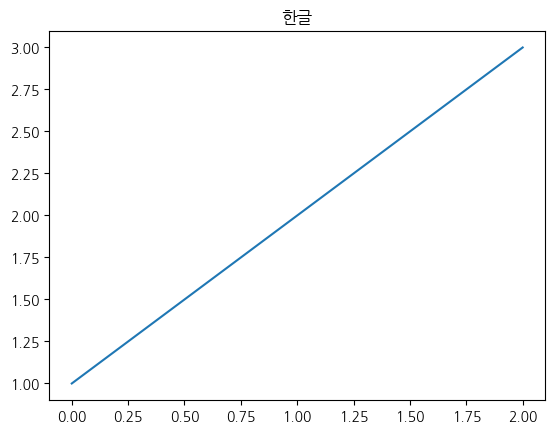

In [12]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from matplotlib import rcParams
rcParams['axes.unicode_minus'] = False

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 로지스틱 회귀
- 선형 회귀 분석과는 다르게 이진 분류 문제를 다룬다.

### 문제 정의
- 타이타닉호의 생존에 여러 정보(성별, 나이 등)가 실제 생존에 어떤 영향을 미치는지 확인

### 데이터 불러오기 및 라이브러리 호출

In [ ]:
import pandas as pd
url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
Data = pd.read_csv(url)

### 데이터 확인

In [ ]:
Data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


- 변수 설명
- 독립변수
    1. Pclass: 티켓 클래스
    2. Name: 이름
    3. Sex: 성별
    4. Age: 나이
    5. SibSp: 함께 탑승한 형제 및 배우자의 수
    6. Parch: 함께 탑승한 부모 및 자녀의 수
    7. Ticket: 티켓 번호
    8. Embarked: 승선한 항구(C = Cherbourg, Q = Queenstown, S = Southamton)
- 종속변수
    + Survived: 생존 유무(1 = 생존, 0 = 사망)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
Data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [ ]:
Data.describe(include = 'object')

,Name,Sex,Ticket,Embarked
count,889,889,889,889
unique,889,2,680,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


- 변수간 상관관계 확인

In [ ]:
Data.corr()

<ipython-input-8-89628327d5af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


- 히트맵으로 나타내기
- SibSp와 Parch의 상관계수가 0.41로 가장 높은 것을 확인

<ipython-input-15-2a74493447dd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)


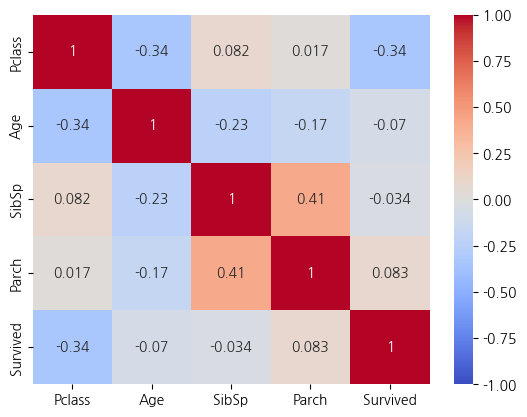

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Data.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)
# cmap: 색상 배열 설정, vmin: 그래프 범위 최소 설정, vmax: 그래프 범위 최대 설정, annot: 수치표시
plt.show()

### 데이터 전처리

- 더미 변수와 원핫 인코딩

In [16]:
Data.describe(include = 'object')

,Name,Sex,Ticket,Embarked
count,889,889,889,889
unique,889,2,680,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


- Name에 따라 생존확률이 달라진다고 보기 힘드므로 변수 제거
= Ticket은 이미 Pclass를 가지고 있으므로 불필요하다고 생각되어 변수 제거

In [17]:
Data = Data.drop(['Name', 'Ticket'], axis = 1)

In [18]:
Data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


- 남은 Sex와 Embarked에 대해 원-핫 인코딩 실행
- 5개의 더미 변수가 새로 생성

In [19]:
pd.get_dummies(Data, columns = ['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,0,1,0,0,1
885,1,19.0,0,0,1,1,0,0,0,1
886,3,28.0,1,2,0,1,0,0,0,1
887,1,26.0,0,0,1,0,1,1,0,0


- Sex_female, Sex_male 둘 다 필요하진 않음 하나만 있어도 구분 가능
- Embarked_Q와 Embarked_S가 모두 0이면 Embarked_C인 승객으로 구분 가능
- 따라서 삭제

In [22]:
Data = pd.get_dummies(Data, columns = ['Sex', 'Embarked'], drop_first = True)
Data

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


### 모델링 및 예측

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = Data.drop('Survived', axis = 1)     # 독립변수
y = Data['Survived']                    # 종속변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

model = LogisticRegression()            # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train)             # 모델 학습

pred = model.predict(X_test)            # 예측

### 예측 모델 평가

In [25]:
from sklearn.metrics import accuracy_score  # 정확도 라이브러리 호출
accuracy_score(y_test, pred)                # 실제값과 예측값으로 정확도 계산

0.7808988764044944

- 로지스틱 회귀 모델의 계수 확인
- 2차원인 것 확인

In [26]:
model.coef_

array([[-1.1821853 , -0.03991491, -0.32121137,  0.00779287, -2.56882216,
        -0.07787206, -0.23503725]])

- 인덱스의 수와 값의 수가 맞지 않아 오류 발생

In [27]:
pd.Series(model.coef_, index = X.columns)

ValueError: ignored

In [28]:
len(model.coef_[0])

7

- Parch를 제외하면 모두 음수 인것을 확인
- Pclass가 높아질수록(좌석 등급이 떨어질수록) 생존율이 낮다.
- Age는 높을수록, Sex는 남성일수록 생존율이 낮다.

In [29]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182185
Age          -0.039915
SibSp        -0.321211
Parch         0.007793
Sex_male     -2.568822
Embarked_Q   -0.077872
Embarked_S   -0.235037
dtype: float64

### 더 알아보기: 피처 엔지니어링
- 피처 엔지니어링(Feature Engineering): 기존 데이터를 손보아 더 나은 변수를 만드는 기법이다.


- 선형 모델에서는 다중공선성 문제를 해결하는 것이 좋다.
- 다중공선성 문제: 독립변수 간에 강한 상관 관계가 높을 때 발생하는 문제로 어떤 독립변수가 종속변수에 영향을 미치는지 파악이 힘들어진다.

- SibSp와 Parch가 강한 상관관계를 가진다. 두 변수의 상관계수가 높은 이유로 모두 가족구성원이라는 것을 추론할 수 있다.
- 따라서 두 변수를 합친다.

In [31]:
Data['Family'] = Data['SibSp'] + Data['Parch']
Data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
Data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,Family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


- 기존보다 정확도가 0.012정도 상승한것을 확인

In [32]:
X = Data.drop('Survived', axis = 1)     # 독립변수
y = Data['Survived']                    # 종속변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

model = LogisticRegression()            # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train)             # 모델 학습

pred = model.predict(X_test)            # 예측
accuracy_score(y_test, pred)            # 정확도 계산

0.7921348314606742